# Support Vector Machine - Example


Support Vector Machines (SVMs in short) are supervised machine learning algorithms that are used for classification and regression purposes. In this kernel, I build a Support Vector Machines classifier to classify a Pulsar star. 
I have used the Predicting a Pulsar Star dataset for this project.

So, let's get started.

# INTRODUCTION TO SVM

**Support Vector Machines** (SVMs in short) are machine learning algorithms that are used for:

1. Classification
2. Regression purposes. 

It is one of the most powerful machine learning algorithms for classification, regression and outlier detection purposes. 
A SVM classifier generates a model that assigns new data points to one of the given categories. 

## HISTORY
The original SVM algorithm was developed by Vladimir N Vapnik and Alexey Ya. Chervonenkis in 1963. 
In 1992, Bernhard E. Boser, Isabelle M Guyon and Vladimir N Vapnik suggested a way to create non-linear classifiers by applying the kernel trick to maximum-margin hyperplanes. 
The current standard was proposed by Corinna Cortes and Vapnik in 1993 and published in 1995.

This is why, today SVMs can be used for both linear classification purposes and non-linear classification using the kernel trick. 

## SVM - Basic Concepts

1. **Hyperplane**
A hyperplane is a decision boundary which separates between given set of data points having different class labels. The SVM classifier separates data points using a hyperplane with the maximum amount of margin. This hyperplane is known as the maximum margin hyperplane and the linear classifier it defines is known as the maximum margin classifier.

2. **Support Vectors**
Support vectors are the sample data points, which are closest to the hyperplane. These data points will define the separating line or hyperplane better by calculating margins.

3. **Margin**
A margin is a separation gap between the two lines on the closest data points. It is calculated as the perpendicular distance from the line to support vectors or closest data points. In SVMs, we try to maximize this separation gap so that we get maximum margin.




Scikit-learn is a free machine learning library for python. We can easily implement ML algorithms with [Scikit-learn](https://www.google.com/search?q=scikit+learn&rlz=1C5CHFA_enES992ES992&oq=scikit+learn&gs_lcrp=EgZjaHJvbWUyDggAEEUYJxg5GIAEGIoFMgwIARAjGCcYgAQYigUyBwgCEAAYgAQyBwgDEAAYgAQyBwgEEAAYgAQyBwgFEAAYgAQyBggGEEUYPDIGCAcQRRg90gEIMjMxMWowajeoAgCwAgA&sourceid=chrome&ie=UTF-8). 
We just need to call the library with parameters that suit to our needs. 

In this example, we'll be dealing with a classification task. 

## Data Set Description

We will be using the [Predicting a Pulsar Star dataset](https://www.kaggle.com/datasets/colearninglounge/predicting-pulsar-starintermediate) for this project.

**Pulsars** are a rare type of Neutron star that produce radio emission detectable here on Earth. They are of considerable scientific interest as probes of space-time, the inter-stellar medium, and states of matter. 
The class labels used are 0 (negative) and 1 (positive).

**Attribute Information:**
Each candidate is described by 8 continuous variables, and a single class variable. 
The first four are simple statistics obtained from the integrated pulse profile. 
The remaining four variables are similarly obtained from the DM-SNR curve . 
The variables are: 

1. Mean of the integrated profile.
2. Standard deviation of the integrated profile.
3. Excess kurtosis of the integrated profile.
4. Skewness of the integrated profile.
5. Mean of the DM-SNR curve.
6. Standard deviation of the DM-SNR curve.
7. Excess kurtosis of the DM-SNR curve.
8. Skewness of the DM-SNR curve.
9. Class

In [12]:
# First things first, we always need to import the libraries. 
import pandas as pd
import numpy  as np
import seaborn as sns
import matplotlib.pyplot as plt

# IRIS CLASSIFICATION - SETOS, VERSICOLOR OR VIRGINICA?

## 1. Getting the data
Today we are dealing with some real-world data to apply our brand new logistic regression model. 
The second example we will see together is how to classify three different species of Iris - Setos, Versicolor and Virginica. 
We are using a Kaggle [Iris dataset](https://www.kaggle.com/datasets/uciml/iris).

In [22]:
# Load dataset
df = pd.read_csv("Files/4. SVM/pulsar_data_train.csv")
df.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0


In [14]:
set(df["target_class"])

{0.0, 1.0}

## 2. Some first analysis
Some first analysis to further get the idea of what data we have in out table. We have 12528 records with 9 variables. 

In [25]:
df.shape

(12528, 9)

In [26]:
# Checking our dataset
df.describe() #describes are data 

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
count,12528.000000,12528.000000,10793.000000,12528.000000,12528.000000,11350.000000,12528.000000,11903.000000,12528.000000
mean,111.041841,46.521437,0.478548,1.778431,12.674758,26.351318,8.333489,105.525779,0.092034
std,25.672828,6.801077,1.064708,6.208450,29.613230,19.610842,4.535783,107.399585,0.289085
min,5.812500,24.772042,-1.738021,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.871094,42.362222,0.024652,-0.188142,1.910535,14.404353,5.803063,35.199899,0.000000
50%,115.183594,46.931022,0.223678,0.203317,2.792642,18.412402,8.451097,83.126301,0.000000
75%,127.109375,50.979103,0.473125,0.932374,5.413253,28.337418,10.727927,139.997850,0.000000
max,189.734375,91.808628,8.069522,68.101622,222.421405,110.642211,34.539844,1191.000837,1.000000


In [27]:
df.info() #gives information about the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12528 entries, 0 to 12527
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                12528 non-null  float64
 1    Standard deviation of the integrated profile  12528 non-null  float64
 2    Excess kurtosis of the integrated profile     10793 non-null  float64
 3    Skewness of the integrated profile            12528 non-null  float64
 4    Mean of the DM-SNR curve                      12528 non-null  float64
 5    Standard deviation of the DM-SNR curve        11350 non-null  float64
 6    Excess kurtosis of the DM-SNR curve           12528 non-null  float64
 7    Skewness of the DM-SNR curve                  11903 non-null  float64
 8   target_class                                   12528 non-null  float64
dtypes: float64(9)
memory usage: 881.0 KB


We observe there are some null-valued records for `Excess kurtosis of the integrated profile `, `Standard deviation of the DM-SNR curve` and `Skewness of the DM-SNR curve`. 
Let's see how many records for each: 

In [51]:
df.isnull().sum()

Mean of the integrated profile                     0
Standard deviation of the integrated profile       0
Excess kurtosis of the integrated profile       1735
Skewness of the integrated profile                 0
Mean of the DM-SNR curve                           0
Standard deviation of the DM-SNR curve          1178
Excess kurtosis of the DM-SNR curve                0
Skewness of the DM-SNR curve                     625
target_class                                       0
dtype: int64

We drop the records with missing values and just keep those with all defined features. 

In [71]:
df = df.dropna()

Now we check the distribution of our dataset.

Number of records for each target class: 
target_class
0.0    8423
1.0     850
Name: count, dtype: int64

Distribution of records for each target class: 
target_class
0.0    91.0
1.0     9.0
Name: count, dtype: float64


/var/folders/5h/h364vcws335c872gj8pv3jvm0000gn/T/ipykernel_91971/852066611.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="target_class", data=df, palette=["blue","red"])


<Axes: xlabel='target_class', ylabel='count'>

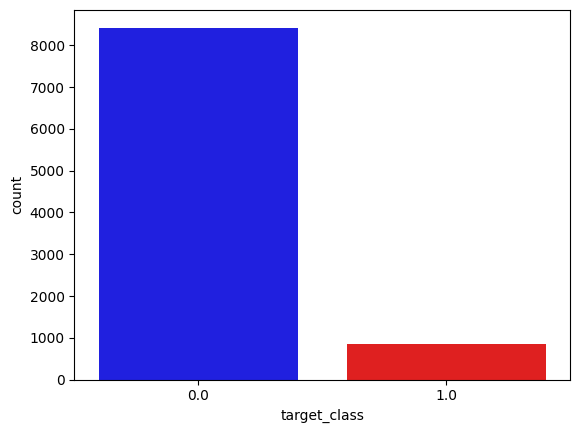

In [72]:
#We can check the distribution of individuals we have for each specie. Remember that strongly imabalanced datasets can be a problem. 
print("Number of records for each target class: ")
print(df["target_class"].value_counts())

print("\nDistribution of records for each target class: ")
print(round(df['target_class'].value_counts()/len(df),2)*100)

sns.countplot(x="target_class", data=df, palette=["blue","red"])

We can see that percentage of observations of the class label 0 and 1 is 91% and 9%. So, this is makes it a **class imbalanced** problem. 
Summary of our dataset:
- There are 9 numerical variables in the dataset.
- 8 are continuous variables (features) and 1 is discrete variable (our target class)
- There are missing values in three of the features: `Excess kurtosis of the integrated profile `, `Standard deviation of the DM-SNR curve` and `Skewness of the DM-SNR curve`. 

# 3. Fixing the structure

We fix the names of the data frame so they do not present an initial blank space. 

In [73]:
col_names = df.columns
print(col_names)

# remove leading spaces from column names
df.columns = df.columns.str.strip()
df

Index(['Mean of the integrated profile',
       'Standard deviation of the integrated profile',
       'Excess kurtosis of the integrated profile',
       'Skewness of the integrated profile', 'Mean of the DM-SNR curve',
       'Standard deviation of the DM-SNR curve',
       'Excess kurtosis of the DM-SNR curve', 'Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')


,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0
7,109.406250,55.912521,0.565106,0.056247,2.797659,19.496527,9.443282,97.374578,0.0
...,...,...,...,...,...,...,...,...,...
12522,124.828125,50.586731,0.233563,-0.286908,2.342809,13.949966,9.226188,117.308146,0.0
12523,124.312500,53.179053,-0.012418,-0.556021,7.186455,29.308266,4.531382,21.725143,0.0
12525,116.031250,43.213846,0.663456,0.433088,0.785117,11.628149,17.055215,312.204325,0.0
12526,135.664062,49.933749,-0.089940,-0.226726,3.859532,21.501505,7.398395,62.334018,0.0


col_names

## 4. Further understanding our data
### Detecting outliers
SVM can deal with outliers, with a higher value of C. 

Text(0, 0.5, 'Skewness of the DM-SNR curve')

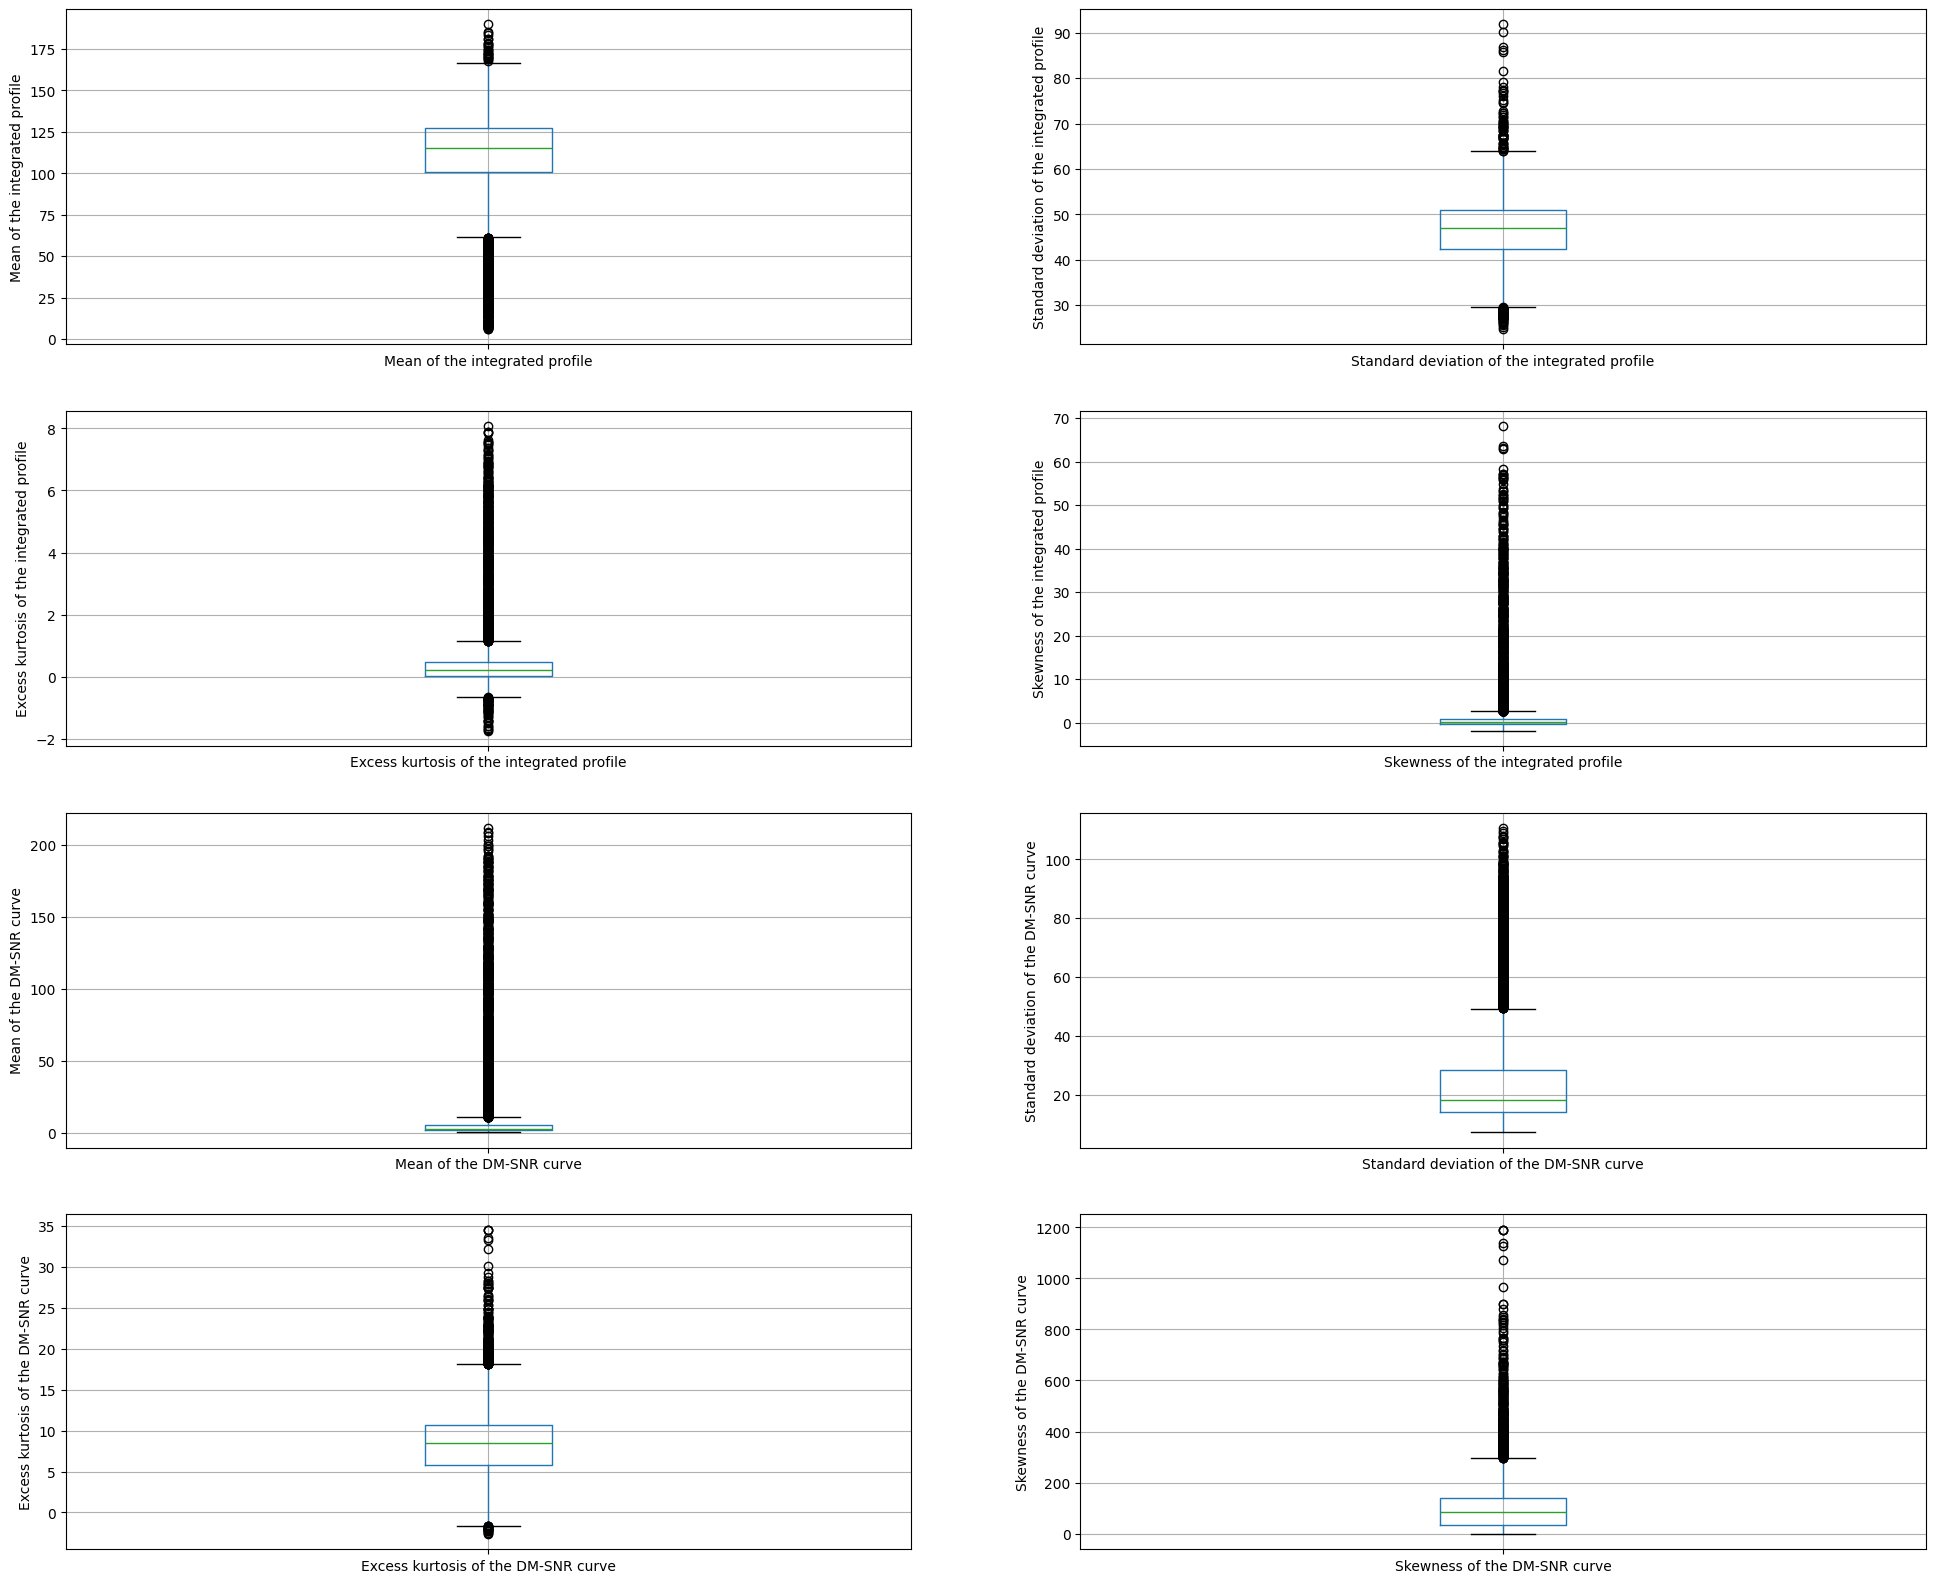

In [74]:
# draw boxplots to visualize outliers

plt.figure(figsize=(24,20))


plt.subplot(4, 2, 1)
fig = df.boxplot(column='Mean of the integrated profile')
fig.set_title('')
fig.set_ylabel('Mean of the integrated profile')


plt.subplot(4, 2, 2)
fig = df.boxplot(column='Standard deviation of the integrated profile')
fig.set_title('')
fig.set_ylabel('Standard deviation of the integrated profile')


plt.subplot(4, 2, 3)
fig = df.boxplot(column='Excess kurtosis of the integrated profile')
fig.set_title('')
fig.set_ylabel('Excess kurtosis of the integrated profile')


plt.subplot(4, 2, 4)
fig = df.boxplot(column='Skewness of the integrated profile')
fig.set_title('')
fig.set_ylabel('Skewness of the integrated profile')


plt.subplot(4, 2, 5)
fig = df.boxplot(column='Mean of the DM-SNR curve')
fig.set_title('')
fig.set_ylabel('Mean of the DM-SNR curve')


plt.subplot(4, 2, 6)
fig = df.boxplot(column='Standard deviation of the DM-SNR curve')
fig.set_title('')
fig.set_ylabel('Standard deviation of the DM-SNR curve')


plt.subplot(4, 2, 7)
fig = df.boxplot(column='Excess kurtosis of the DM-SNR curve')
fig.set_title('')
fig.set_ylabel('Excess kurtosis of the DM-SNR curve')


plt.subplot(4, 2, 8)
fig = df.boxplot(column='Skewness of the DM-SNR curve')
fig.set_title('')
fig.set_ylabel('Skewness of the DM-SNR curve')

### HEATMAP
To understand what variables have a strong impact in our penguin species, we can use different commands. The first one is a Heat Map, that visually represents the correlation between all pairs of numeric columns within our DataFrame. The correlation range to 1 to -1 and indicates the strength and direction of their relationship.

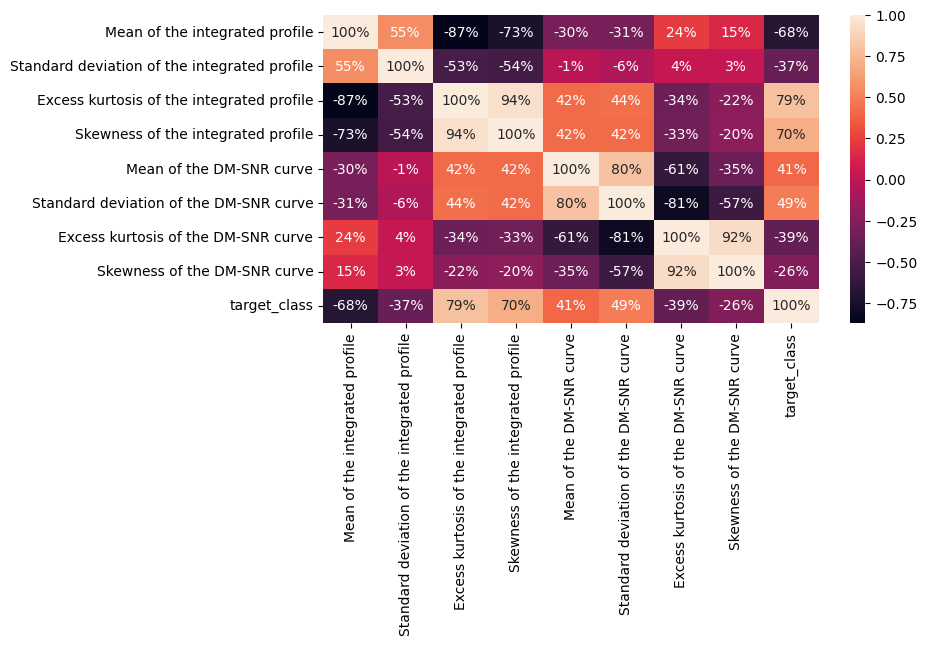

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(8, 4))

import seaborn as sns
sns.heatmap(numeric_df.corr(), annot=True, fmt=".0%")
plt.show()

In [76]:
col_names

Index(['Mean of the integrated profile',
       'Standard deviation of the integrated profile',
       'Excess kurtosis of the integrated profile',
       'Skewness of the integrated profile', 'Mean of the DM-SNR curve',
       'Standard deviation of the DM-SNR curve',
       'Excess kurtosis of the DM-SNR curve', 'Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

Text(0, 0.5, 'Number of pulsar stars')

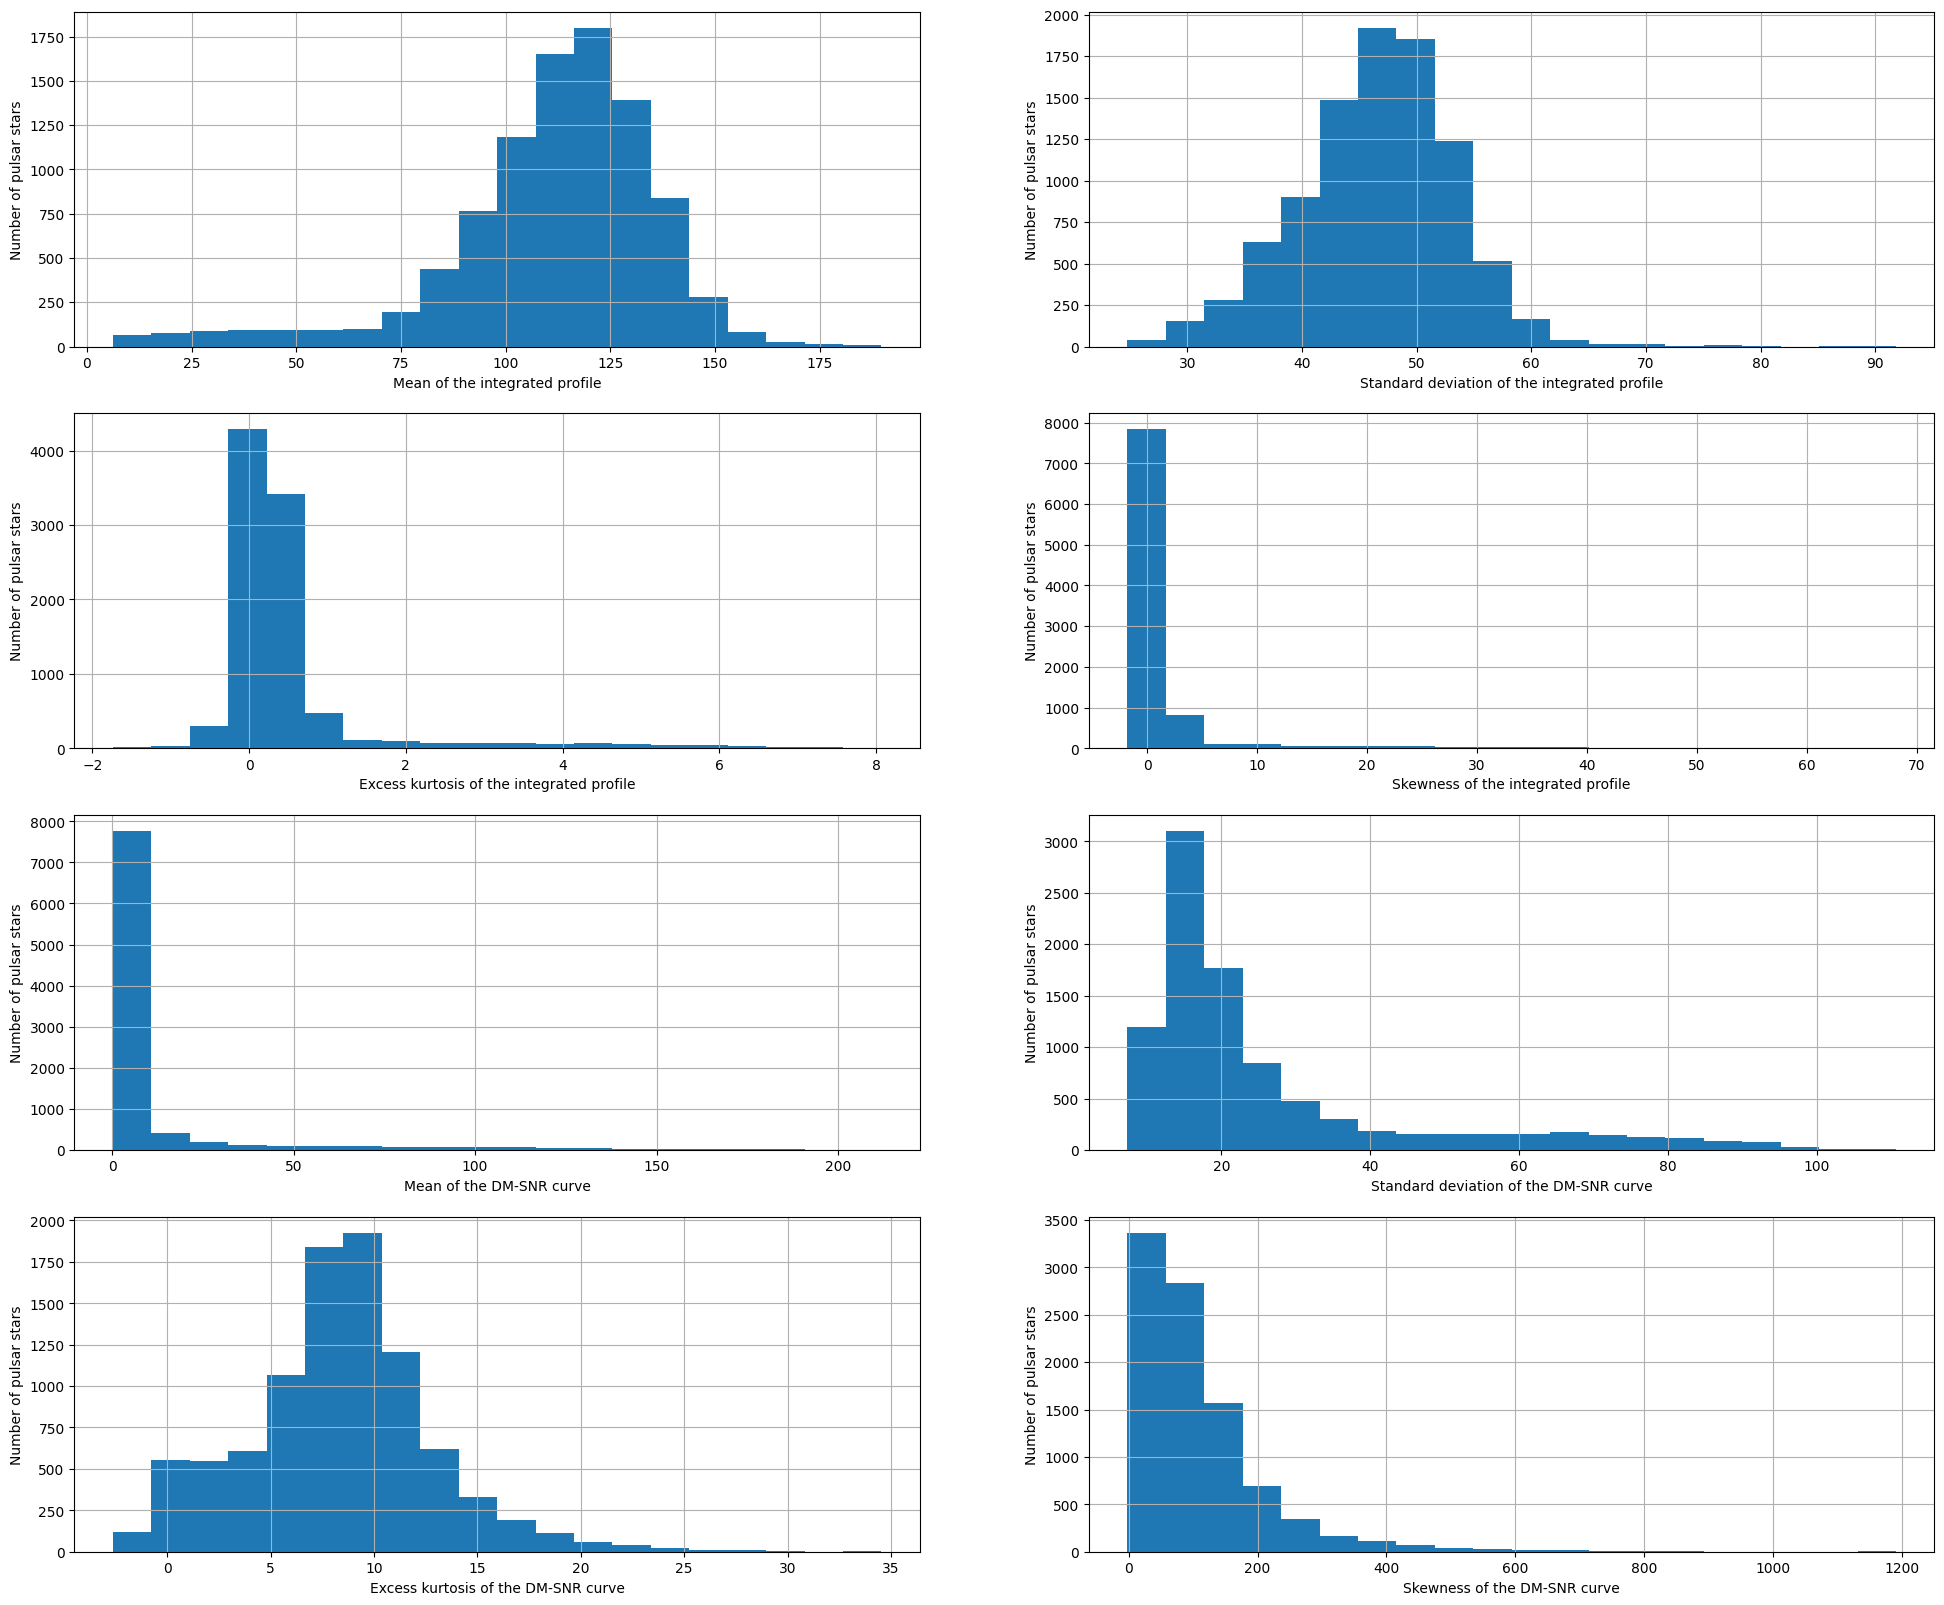

In [77]:
# plot histogram to check distribution


plt.figure(figsize=(24,20))


plt.subplot(4, 2, 1)
fig = df['Mean of the integrated profile'].hist(bins=20)
fig.set_xlabel('Mean of the integrated profile')
fig.set_ylabel('Number of pulsar stars')


plt.subplot(4, 2, 2)
fig = df['Standard deviation of the integrated profile'].hist(bins=20)
fig.set_xlabel('Standard deviation of the integrated profile')
fig.set_ylabel('Number of pulsar stars')


plt.subplot(4, 2, 3)
fig = df['Excess kurtosis of the integrated profile'].hist(bins=20)
fig.set_xlabel('Excess kurtosis of the integrated profile')
fig.set_ylabel('Number of pulsar stars')



plt.subplot(4, 2, 4)
fig = df['Skewness of the integrated profile'].hist(bins=20)
fig.set_xlabel('Skewness of the integrated profile')
fig.set_ylabel('Number of pulsar stars')



plt.subplot(4, 2, 5)
fig = df['Mean of the DM-SNR curve'].hist(bins=20)
fig.set_xlabel('Mean of the DM-SNR curve')
fig.set_ylabel('Number of pulsar stars')



plt.subplot(4, 2, 6)
fig = df['Standard deviation of the DM-SNR curve'].hist(bins=20)
fig.set_xlabel('Standard deviation of the DM-SNR curve')
fig.set_ylabel('Number of pulsar stars')



plt.subplot(4, 2, 7)
fig = df['Excess kurtosis of the DM-SNR curve'].hist(bins=20)
fig.set_xlabel('Excess kurtosis of the DM-SNR curve')
fig.set_ylabel('Number of pulsar stars')


plt.subplot(4, 2, 8)
fig = df['Skewness of the DM-SNR curve'].hist(bins=20)
fig.set_xlabel('Skewness of the DM-SNR curve')
fig.set_ylabel('Number of pulsar stars')

# CLASSIFICATION
As our target variable is already encoded, there's no need to encode it. 

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Select the features and the target variable
X = df.drop(['target_class'], axis=1) # We get all features
Y = df['target_class'] # We get the target variable

# Splitting into training and testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=42)

# We check the size of our vectors
X_train.shape, X_test.shape

# Now we scale our features
cols = X_train.columns

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

# Generate DataFrames
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])

In [79]:
X_train.describe()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve
count,4.636000e+03,4.636000e+03,4.636000e+03,4.636000e+03,4.636000e+03,4.636000e+03,4.636000e+03,4.636000e+03
mean,1.318090e-16,-5.862437e-16,-1.118844e-16,1.072864e-17,-1.685930e-17,5.977387e-17,-3.065327e-16,-1.103518e-16
std,1.000108e+00,1.000108e+00,1.000108e+00,1.000108e+00,1.000108e+00,1.000108e+00,1.000108e+00,1.000108e+00
min,-4.063653e+00,-3.175366e+00,-2.055371e+00,-5.679174e-01,-4.168269e-01,-9.666252e-01,-2.380435e+00,-9.876255e-01
25%,-3.973227e-01,-6.043560e-01,-4.220408e-01,-3.149050e-01,-3.602479e-01,-6.111709e-01,-5.578008e-01,-6.489257e-01
50%,1.527439e-01,4.889094e-02,-2.329108e-01,-2.529433e-01,-3.302646e-01,-3.977883e-01,1.631551e-02,-2.172750e-01
75%,6.229878e-01,6.455347e-01,-3.037384e-03,-1.380031e-01,-2.429255e-01,1.054195e-01,5.113777e-01,3.046887e-01
max,3.039970e+00,6.611415e+00,6.858081e+00,9.713643e+00,6.672657e+00,4.341174e+00,5.692084e+00,9.792507e+00


In [81]:
from sklearn.svm import SVC # import SVC classifier
from sklearn.metrics import accuracy_score # import metrics to compute accuracy

# Initialize the classifier
svc=SVC()  
svc.fit(X_train, Y_train) # fit classifier to training set
y_pred=svc.predict(X_test) # make predictions on test set

# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(Y_test, y_pred)))

Model accuracy score with default hyperparameters: 0.9778
